In [1]:
from powerspectra import Powerspectra
from modecoupling import Modecoupling
import matplotlib.pyplot as plt
from cosmology import Cosmology
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

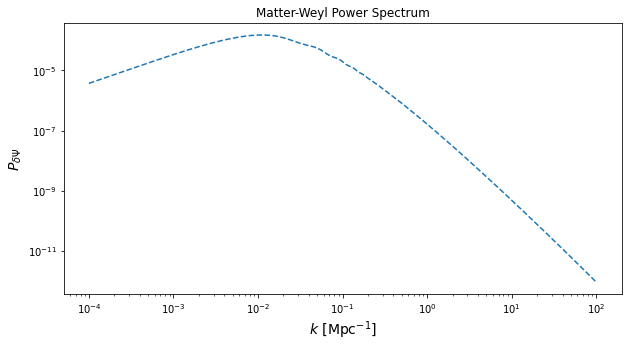

In [3]:
# Matter-Weyl Potential
power = Powerspectra()
ks = np.logspace(-4, 2, 200)
z = 20
ps = power.get_matter_weyl_ps(z, ks)

plt.figure()
plt.loglog(ks, np.abs(ps), linestyle="--")
plt.ylabel("$P_{\delta\Psi}$", fontsize=14)
plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
plt.title("Matter-Weyl Power Spectrum")
plt.show()

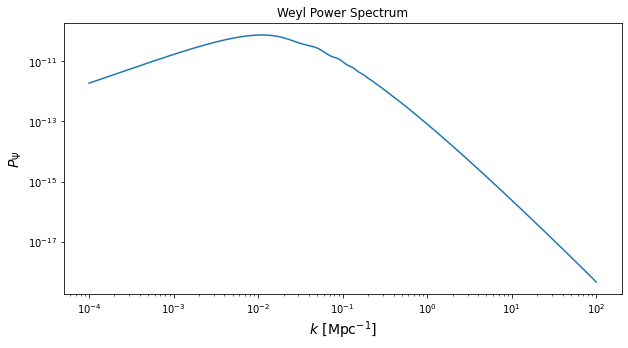

In [4]:
# Weyl Potential
power = Powerspectra()
ks = np.logspace(-4, 2, 200)
z = 20
ps = power.get_weyl_ps(z, ks)

plt.figure()
plt.loglog(ks, ps)
plt.ylabel("$P_{\Psi}$", fontsize=14)
plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
plt.title("Weyl Power Spectrum")
plt.show()

In [5]:
cosmo = Cosmology()
print(cosmo.z_to_Chi(0.311))

1271.4860479186814


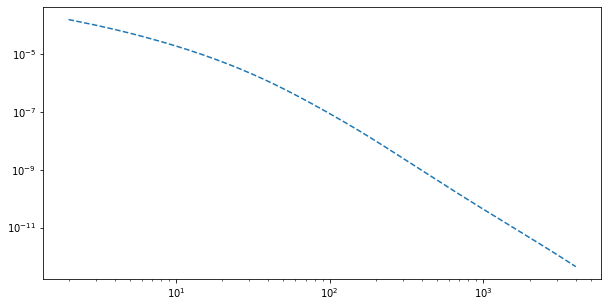

In [6]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_gk = power.get_gal_kappa_ps(ells, Chi_str)
plt.figure()
#plt.loglog(ells, np.abs(Cl_gk)*(ells*(ells + 1))**2/(2*np.pi))
plt.loglog(ells, np.abs(Cl_gk), linestyle="--")
plt.show()

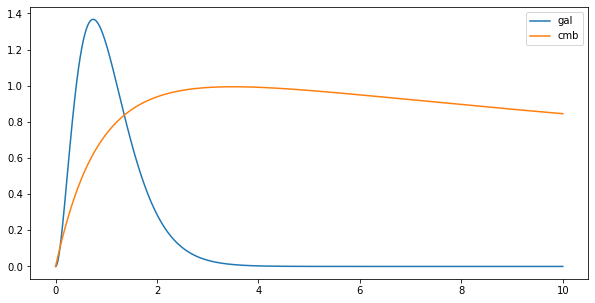

In [7]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
gal_window = cosmo.gal_cluster_window(Chis)
cmb_window = cosmo.cmb_lens_window(Chis, Chi_str)
zs = cosmo.Chi_to_z(Chis)
plt.figure()
plt.plot(zs, gal_window, label="gal")
plt.plot(zs, Chis**2*cmb_window/3500, label="cmb")
plt.legend()
plt.show()

(0.0, 3.0)

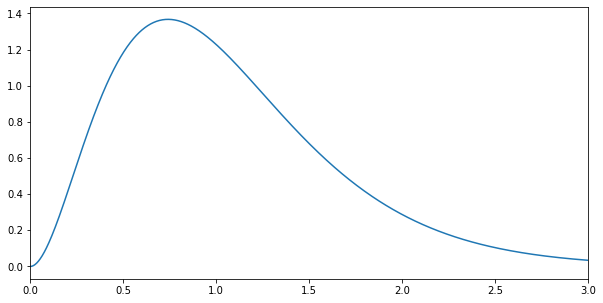

In [8]:
zs = cosmo.Chi_to_z(Chis)
plt.figure()
plt.plot(zs, gal_window)
plt.xlim(0, 3)

In [9]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kk = mode.components(ells1, ells2, Nchi=100)

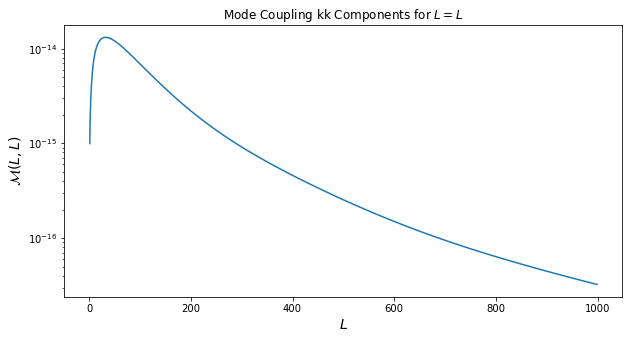

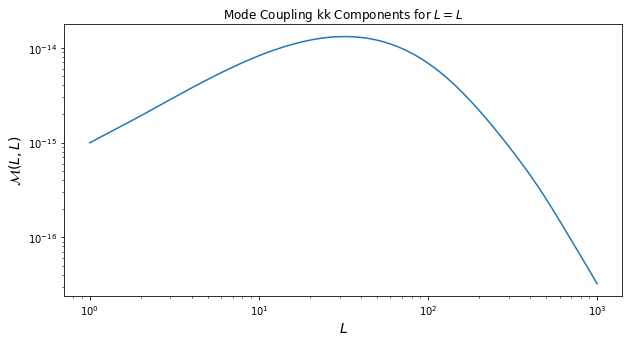

In [10]:
plt.figure()
plt.semilogy(ells1, M_kk)
plt.title("Mode Coupling kk Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_kk)
plt.title("Mode Coupling kk Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

In [11]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_gg = mode.components(ells1, ells2, typ="gal-gal", Nchi=100)

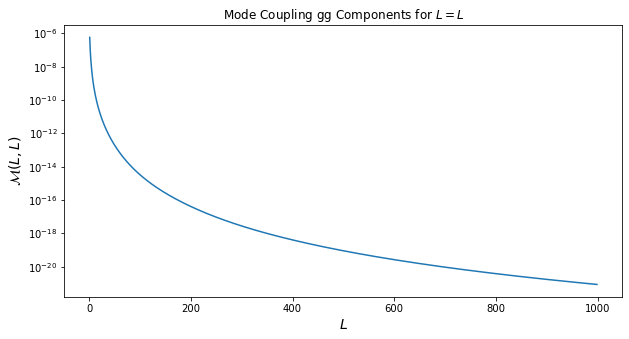

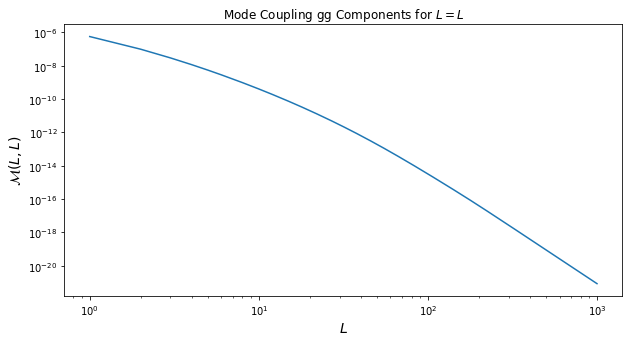

In [18]:
plt.figure()
plt.semilogy(ells1, M_gg)
plt.title("Mode Coupling gg Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_gg)
plt.title("Mode Coupling gg Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

In [13]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_gk = mode.components(ells1, ells2, typ="gal-kappa", Nchi=100)

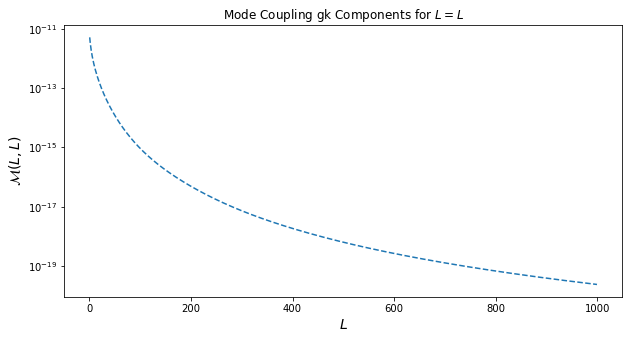

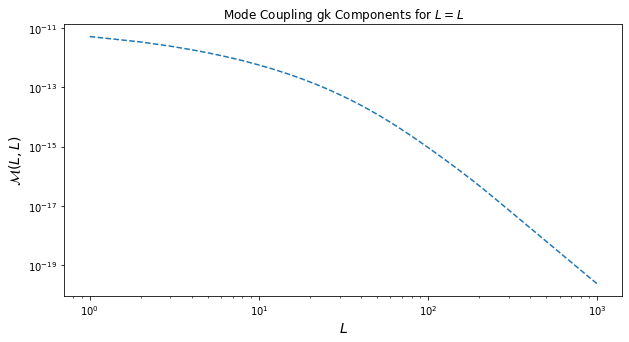

In [14]:
plt.figure()
plt.semilogy(ells1, np.abs(M_gk), linestyle="--")
plt.title("Mode Coupling gk Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_gk), linestyle="--")
plt.title("Mode Coupling gk Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

In [15]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kg = mode.components(ells1, ells2, typ="kappa-gal", Nchi=100)

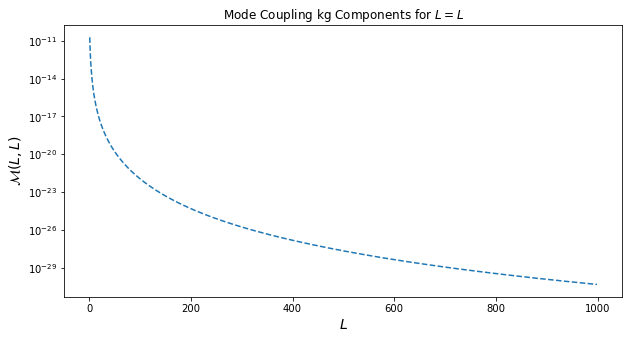

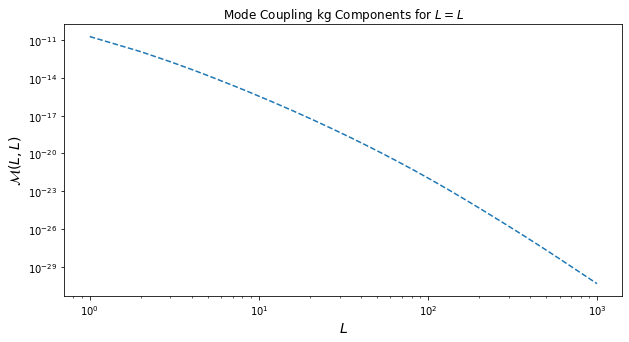

In [16]:
plt.figure()
plt.semilogy(ells1, np.abs(M_kg), linestyle="--")
plt.title("Mode Coupling kg Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_kg), linestyle="--")
plt.title("Mode Coupling kg Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()